In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('./Datasets/OnlineRetail.csv',encoding='Latin')

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [10]:
df.shape

(541909, 8)

In [9]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
print(df['Country'].value_counts())

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


In [18]:
df.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T

,count,mean,std,min,0%,5%,50%,95%,99%,100%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,-80995.00,1.00,3.00,29.00,100.0,80995.0,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,-11062.06,0.42,2.08,9.95,18.0,38970.0,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,12346.00,12626.00,15152.00,17905.00,18212.0,18287.0,18287.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1b6b7e5f590>,
 'caps': [<matplotlib.lines.Line2D at 0x1b6b7efa240>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b6b7ef9a90>],
 'medians': [<matplotlib.lines.Line2D at 0x1b6b7efa7b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b6b7efaab0>],
 'means': []}

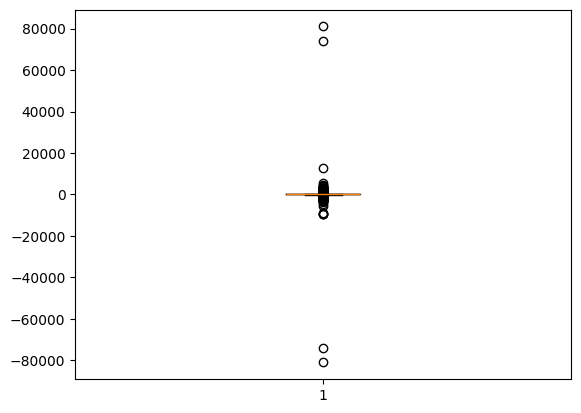

In [16]:
plt.boxplot(df['Quantity'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1b6b80ed070>,
 'caps': [<matplotlib.lines.Line2D at 0x1b6b7f32d50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b6b80ece90>],
 'medians': [<matplotlib.lines.Line2D at 0x1b6b80ed880>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b6b80edb50>],
 'means': []}

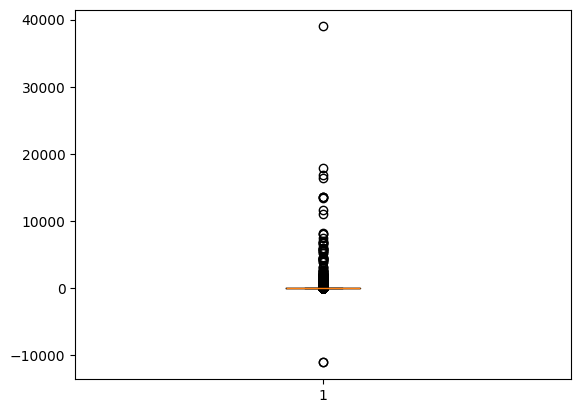

In [17]:
plt.boxplot(df['UnitPrice'])

In [19]:
# Let's detect and remove outliers

q1 = df['Quantity'].quantile(0.01)
q3 = df['Quantity'].quantile(0.99)
iqr = q3-q1

lb = q1 - (1.5 * iqr)
ub = q3 + (1.5 * iqr)

print("q1", q1)
print("q3", q3)
print("iqr", iqr)
print("lb", lb)
print("ub", ub)

q1 -2.0
q3 100.0
iqr 102.0
lb -155.0
ub 253.0


In [22]:
df.loc[df['Quantity']> ub, 'Quantity'] = ub
df.loc[df['Quantity'] < lb, 'Quantity'] = lb

{'whiskers': [<matplotlib.lines.Line2D at 0x1b6b71c5400>,
 'caps': [<matplotlib.lines.Line2D at 0x1b6b81385c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b6b7ea1a90>],
 'medians': [<matplotlib.lines.Line2D at 0x1b6b8138b90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b6b8138e30>],
 'means': []}

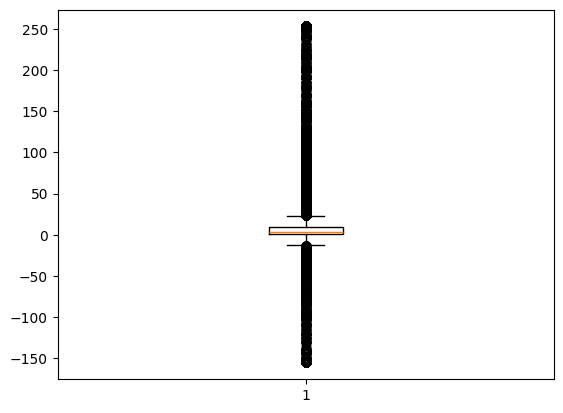

In [23]:
plt.boxplot(df['Quantity'])

In [24]:
q1 = df['UnitPrice'].quantile(0.01)
q3 = df['UnitPrice'].quantile(0.99)
iqr = q3-q1

lb = q1 - (1.5 * iqr)
ub = q3 + (1.5 * iqr)

print("q1", q1)
print("q3", q3)
print("iqr", iqr)
print("lb", lb)
print("ub", ub)

q1 0.19
q3 18.0
iqr 17.81
lb -26.524999999999995
ub 44.714999999999996


In [25]:
df.loc[df['UnitPrice']> ub, 'UnitPrice'] = ub
df.loc[df['UnitPrice'] < lb, 'UnitPrice'] = lb

{'whiskers': [<matplotlib.lines.Line2D at 0x1b6b7f78650>,
 'caps': [<matplotlib.lines.Line2D at 0x1b6b7f78740>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b6b7f783b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b6b7f78c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b6b7f78ef0>],
 'means': []}

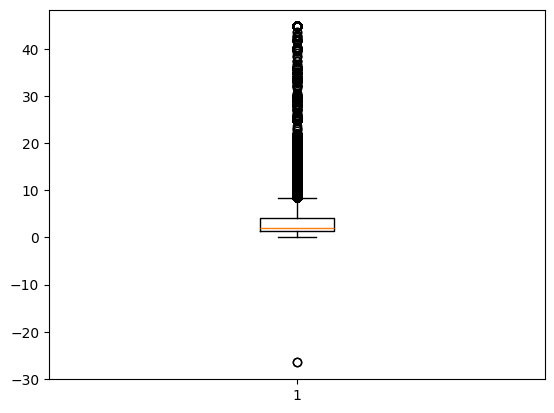

In [26]:
plt.boxplot(df['UnitPrice'])

In [28]:
df.describe([0, 0.05, 0.5, 0.99, 1]).T

,count,mean,std,min,0%,5%,50%,99%,100%,max
Quantity,541909.0,9.130489,22.300513,-155.000,-155.000,1.00,3.00,100.0,253.000,253.000
UnitPrice,541909.0,3.368006,4.116091,-26.525,-26.525,0.42,2.08,18.0,44.715,44.715
CustomerID,406829.0,15287.690570,1713.600303,12346.000,12346.000,12626.00,15152.00,18212.0,18287.000,18287.000


In [35]:
df = df[(df['Quantity'] >= 0) & (df['UnitPrice'] >= 0)]

<Axes: >

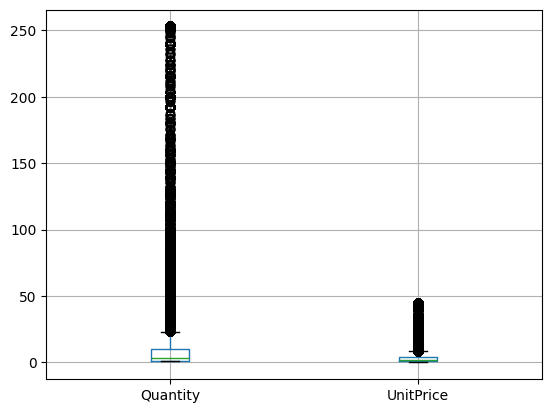

In [36]:
df.boxplot(['Quantity','UnitPrice'])

In [37]:
df = df[df['Quantity'] < 150]

In [38]:
df.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T

,count,mean,std,min,0%,5%,50%,95%,99%,100%,max
Quantity,528418.0,8.431972,14.776869,1.0,1.0,1.00,3.00,25.00,96.00,149.000,149.000
UnitPrice,528418.0,3.347981,3.992863,0.0,0.0,0.42,2.08,9.95,16.98,44.715,44.715
CustomerID,395221.0,15293.213842,1712.276647,12347.0,12347.0,12627.00,15157.00,17904.00,18212.00,18287.000,18287.000


In [39]:
df['CustomerID'] = df['CustomerID'].fillna(0)

In [40]:
df.isnull().sum()

InvoiceNo        0
StockCode        0
Description    554
Quantity         0
InvoiceDate      0
UnitPrice        0
CustomerID       0
Country          0
dtype: int64

In [42]:
df.dropna(subset=['Description'],inplace=True)

In [43]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64